# Lab 9

## Integrantes:

Alejandro Gómez

Roberto Vallecillos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [88]:
# Leer archivo

df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
# Descriptive statistics
print(df.describe())

               area         rooms      bathroom  parking spaces      hoa (R$)  \
count  10692.000000  10692.000000  10692.000000    10692.000000  1.069200e+04   
mean     149.217920      2.506079      2.236813        1.609147  1.174022e+03   
std      537.016942      1.171266      1.407198        1.589521  1.559231e+04   
min       11.000000      1.000000      1.000000        0.000000  0.000000e+00   
25%       56.000000      2.000000      1.000000        0.000000  1.700000e+02   
50%       90.000000      2.000000      2.000000        1.000000  5.600000e+02   
75%      182.000000      3.000000      3.000000        2.000000  1.237500e+03   
max    46335.000000     13.000000     10.000000       12.000000  1.117000e+06   

       rent amount (R$)  property tax (R$)  fire insurance (R$)    total (R$)  
count      10692.000000       10692.000000         10692.000000  1.069200e+04  
mean        3896.247194         366.704358            53.300879  5.490487e+03  
std         3408.545518       

C:\Users\rober\AppData\Local\Temp\ipykernel_23588\3342398959.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rent amount (R$)'], fit=norm)


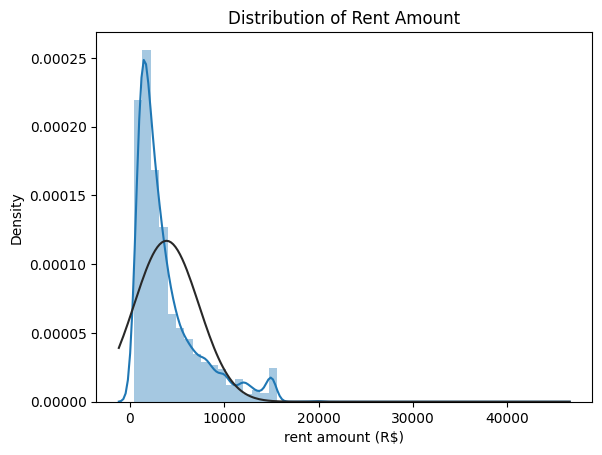

In [4]:
# Distribution of rent amount
sns.distplot(df['rent amount (R$)'], fit=norm)
plt.title('Distribution of Rent Amount')
plt.show()

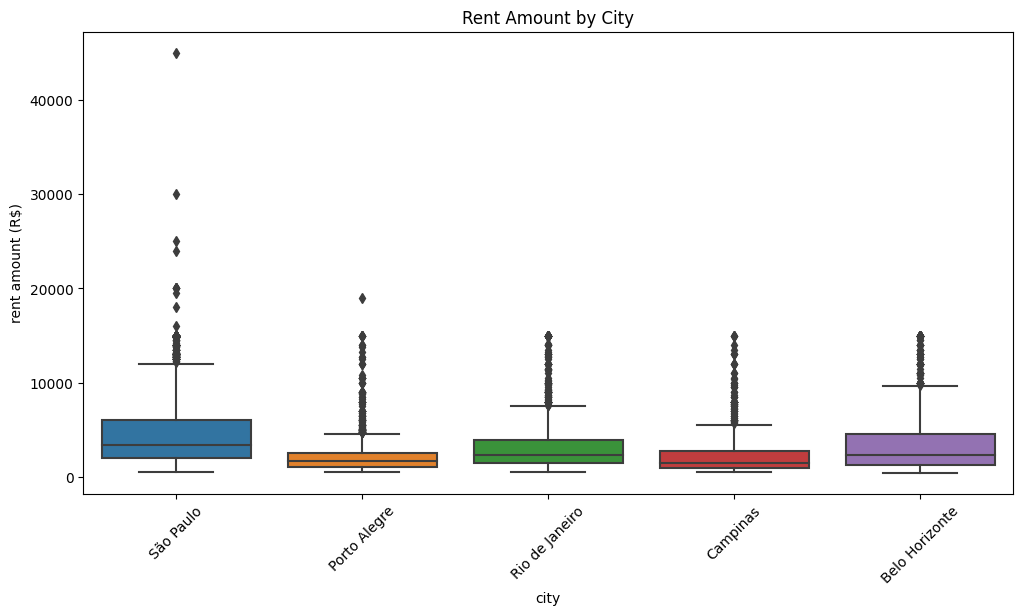

In [5]:
# Boxplot of rent amount by city
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='rent amount (R$)', data=df)
plt.title('Rent Amount by City')
plt.xticks(rotation=45)
plt.show()

C:\Users\rober\AppData\Local\Temp\ipykernel_23588\1106043341.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


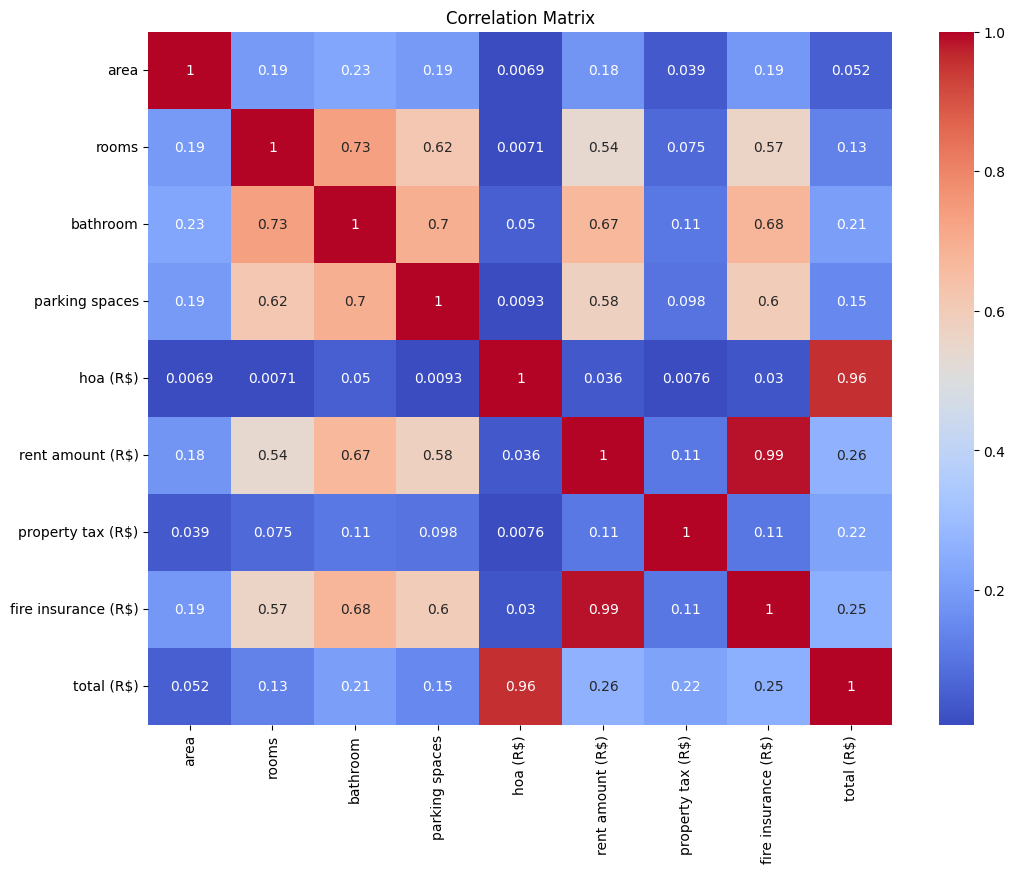

In [6]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


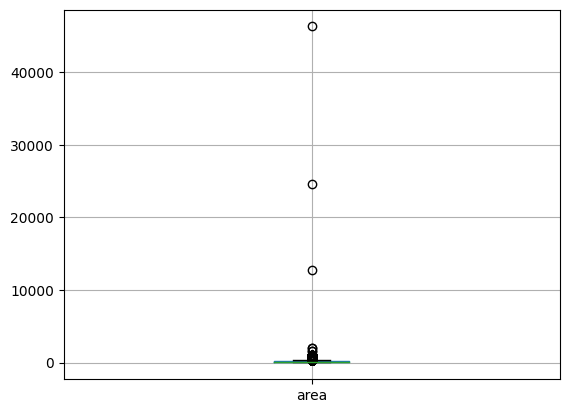

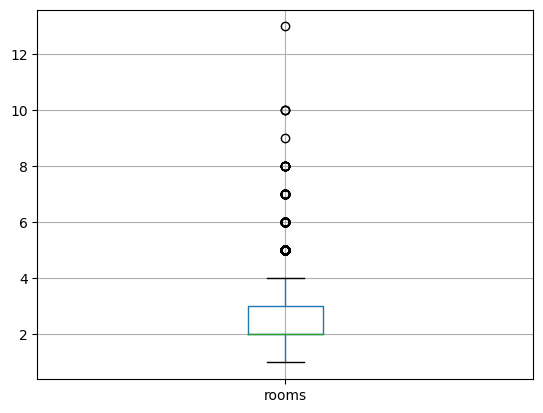

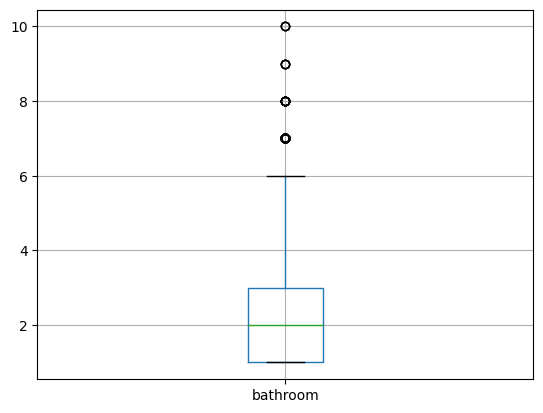

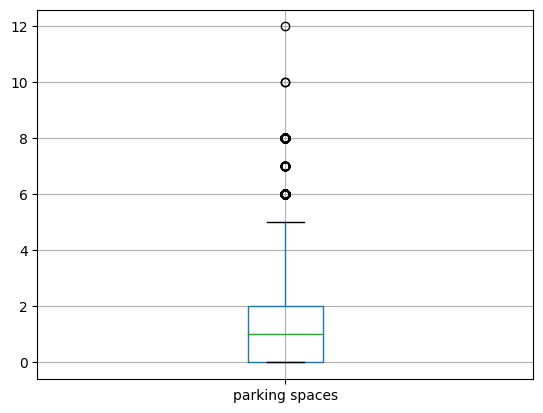

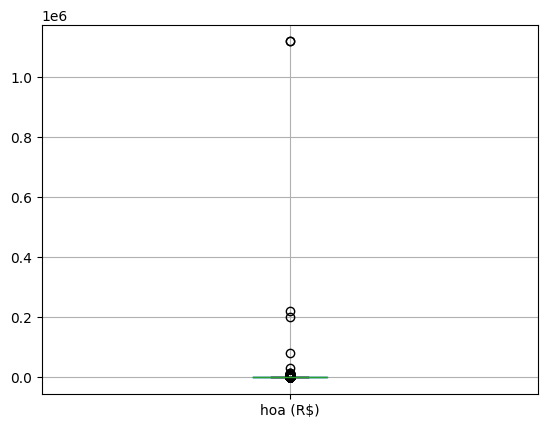

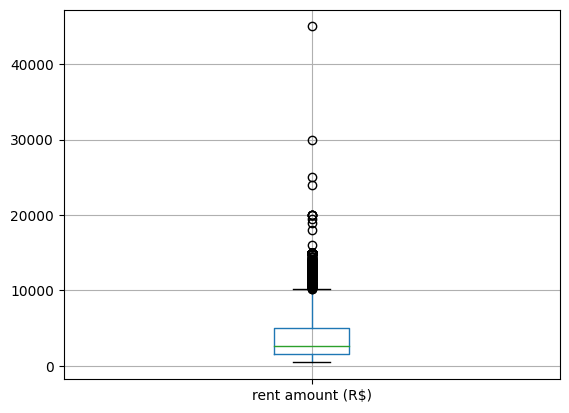

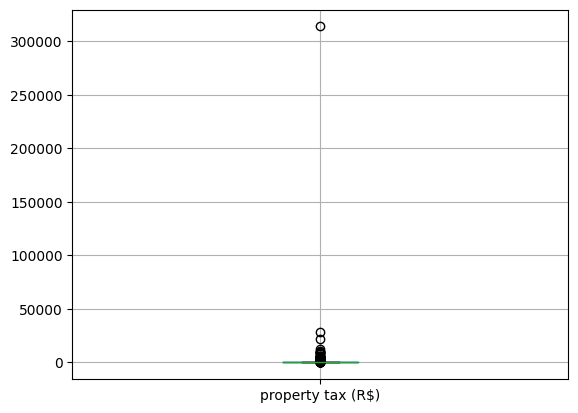

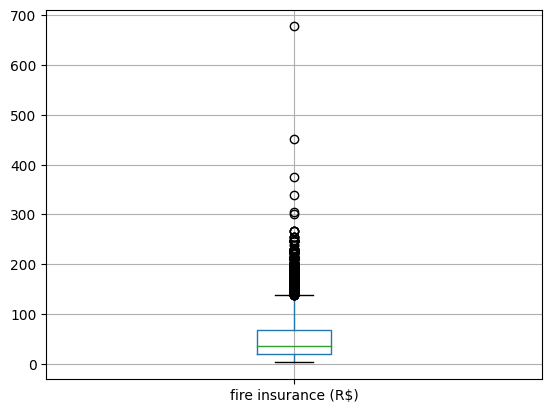

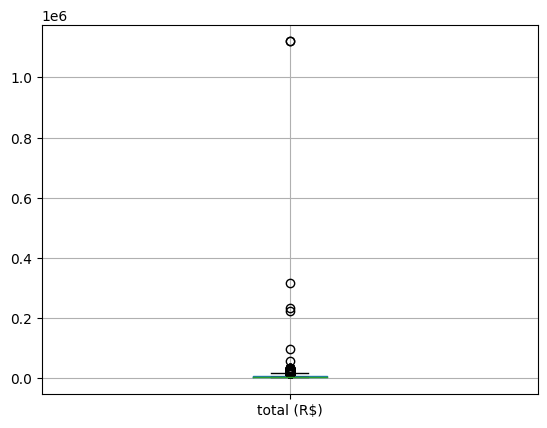

In [8]:
# Boxplots para identificar outliers
for column in df.select_dtypes(include=['float64', 'int64']):
    plt.figure()
    df.boxplot([column])

array([[<AxesSubplot: title={'center': 'area'}>,
        <AxesSubplot: title={'center': 'rooms'}>,
        <AxesSubplot: title={'center': 'bathroom'}>],
       [<AxesSubplot: title={'center': 'parking spaces'}>,
        <AxesSubplot: title={'center': 'hoa (R$)'}>,
        <AxesSubplot: title={'center': 'rent amount (R$)'}>],
       [<AxesSubplot: title={'center': 'property tax (R$)'}>,
        <AxesSubplot: title={'center': 'fire insurance (R$)'}>,
        <AxesSubplot: title={'center': 'total (R$)'}>]], dtype=object)

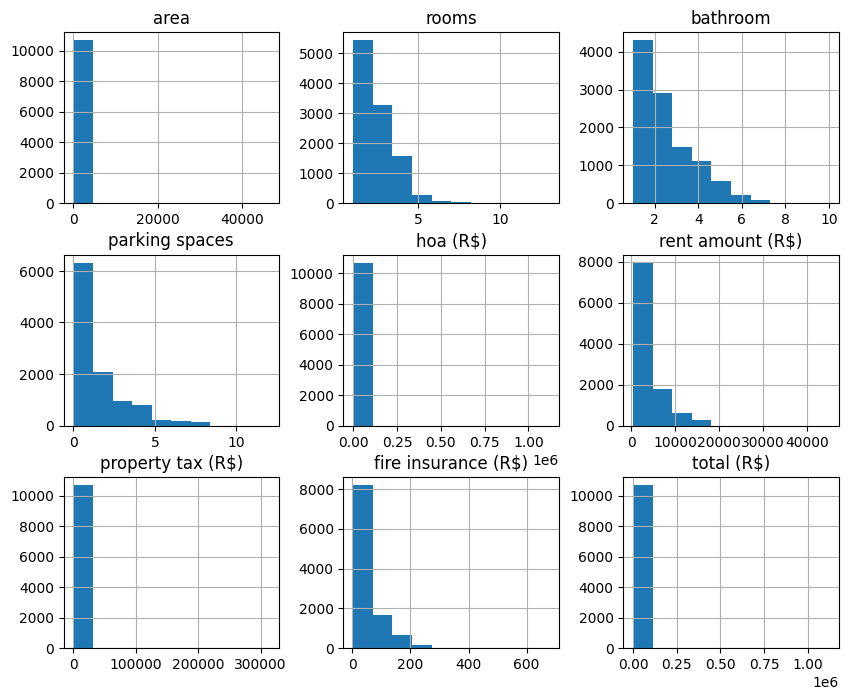

In [9]:
# Histogramas para variables numéricas
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(10, 8))


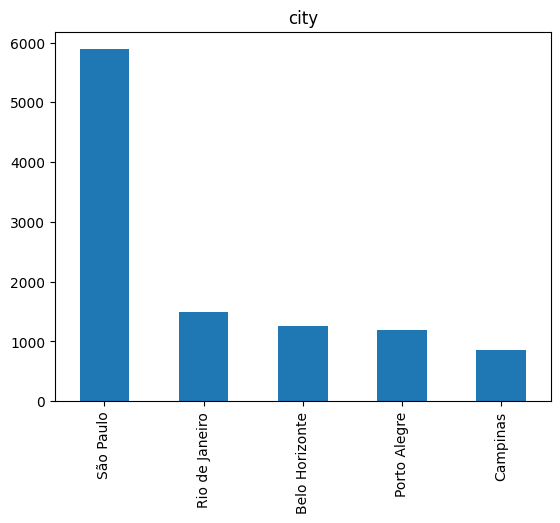

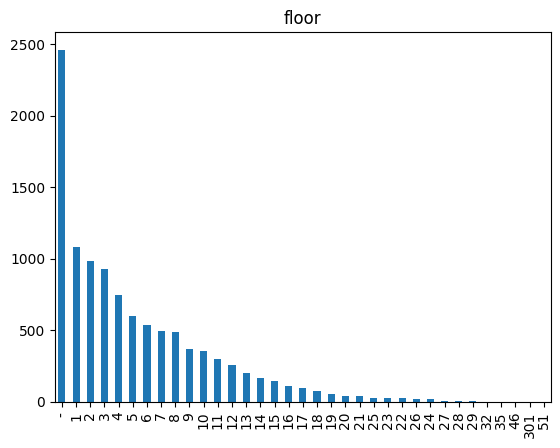

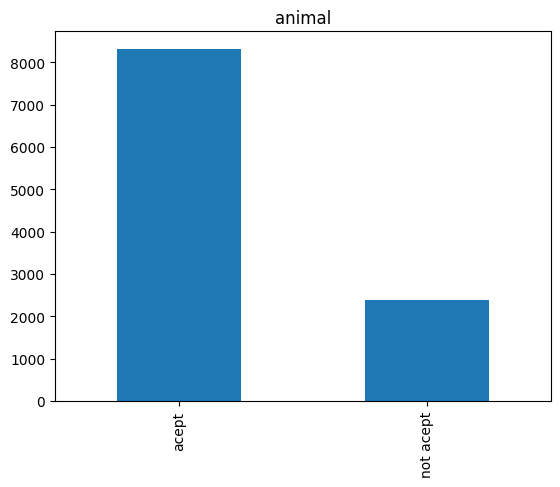

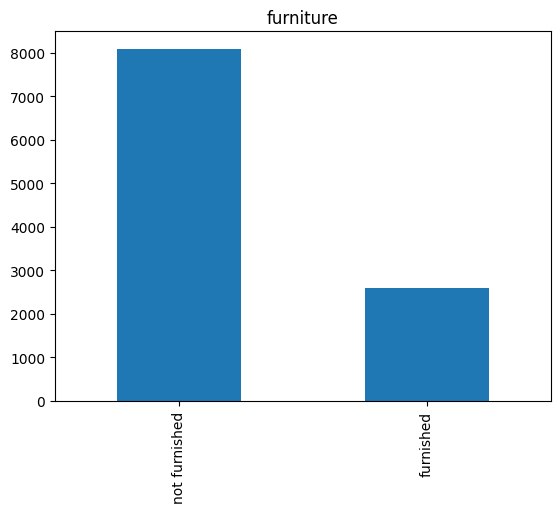

In [10]:
# Gráficos de barras para variables categóricas
for column in df.select_dtypes(include=['object']):
    plt.figure()
    df[column].value_counts().plot(kind='bar', title=column)

In [89]:
# Porcentaje de datos faltantes por columna
missing_data = df.isnull().sum() / len(df) * 100
print(missing_data[missing_data > 0])


Series([], dtype: float64)


In [90]:
# Imputación de valores faltantes (usando la mediana en este caso)
imputer = SimpleImputer(strategy='median')
df[df.select_dtypes(include=['float64', 'int64']).columns] = imputer.fit_transform(df.select_dtypes(include=['float64', 'int64']))

# Eliminar duplicados
df.drop_duplicates(inplace=True)

## 📊 **Análisis Descriptivo de Datos de Alquiler de Viviendas**

### 📏 **Dimensiones de la Vivienda**

- **Área**:
  - El tamaño promedio de las viviendas es de aproximadamente 149.22 m².
  - Las viviendas varían en tamaño desde un mínimo de 11 m² hasta un impresionante máximo de 46,335 m².
  - La mitad de las viviendas tienen un tamaño de hasta 90 m².

- **Habitaciones**:
  - En promedio, las viviendas tienen 2.5 habitaciones.
  - Existen viviendas con hasta 13 habitaciones.

### 🛁 **Características Adicionales**

- **Baños**:
  - La media de baños por vivienda es de aproximadamente 2.24.
  - Las viviendas pueden tener hasta 10 baños.

- **Plazas de Estacionamiento**:
  - En promedio, las viviendas cuentan con 1.6 plazas de estacionamiento.
  - Hay viviendas que disponen de hasta 12 plazas.

### 💰 **Aspectos Financieros**

- **Asociación de Propietarios (HOA)**:
  - El costo promedio de la HOA es de R$ 1,174.02, pero hay propiedades que no tienen costos de HOA y otras que llegan hasta R$ 1,117,000.

- **Monto del Alquiler**:
  - En promedio, el alquiler mensual es de R$ 3,896.25.
  - Los alquileres pueden ser tan bajos como R$ 450 o tan altos como R$ 45,000.

- **Impuesto Predial**:
  - El impuesto predial promedio es de R$ 366.70, con propiedades exentas de impuestos y otras con un impuesto tan alto como R$ 313,700.

- **Seguro contra Incendios**:
  - El costo promedio del seguro contra incendios es de R$ 53.30.

### 📌 **Conclusiones Generales**

- El conjunto de datos presenta una amplia variedad en términos de características y costos asociados con las viviendas.
- La gran desviación estándar en varias columnas indica una alta variabilidad en los datos, lo que sugiere que el mercado de alquiler tiene opciones para una amplia gama de demandas y presupuestos.
- Es esencial tener precaución con los valores extremos (outliers), ya que pueden influir en el análisis y en modelos predictivos.

📚 **Bibliografía**:
1. Witten, I. H., Frank, E., Hall, M. A., & Pal, C. J. (2016). *Data Mining: Practical machine learning tools and techniques*. Morgan Kaufmann.
2. Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*. Springer Science & Business Media.


## Modelos de Referencia

In [92]:
from sklearn.model_selection import train_test_split
scalerX = StandardScaler().set_output(transform="pandas")
scalerY = StandardScaler().set_output(transform="pandas")

df['city'].replace(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas','Belo Horizonte',],                      [0, 1,2,3,4], inplace=True)
# Use applymap to replace the empty string with NaN
df = df.applymap(lambda x: None if x == '-' else x)
df = df.dropna(how='any')
df['animal'].replace(['not acept', 'acept'],                      [0, 1], inplace=True)
df['furniture'].replace(['not furnished', 'furnished'],                      [0, 1], inplace=True)
dfa = df
X = scalerX.fit_transform(df[["city","area","rooms","bathroom","parking spaces","floor","animal","furniture","hoa (R$)","rent amount (R$)","property tax (R$)","fire insurance (R$)"]])
Y = scalerY.fit_transform(df["total (R$)"].values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(
  X,
  df["total (R$)"],
  test_size=0.20
)
print(y_test)

5805     1777.0
856      2940.0
5481    11500.0
1531     3482.0
4301     3520.0
         ...   
9534     1890.0
8294     4457.0
6463     5012.0
8913     1472.0
9618    12730.0
Name: total (R$), Length: 1593, dtype: float64


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization


In [108]:
from tensorflow.keras.regularizers import l2

batched_model = Sequential([
    Dense(128, activation='leaky_relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(64, activation='leaky_relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dense(1, activation='linear')
])

In [109]:
from keras.callbacks import EarlyStopping


batched_model.compile(
    optimizer='adam', 
    loss='mean_squared_error', 
    metrics=['mean_squared_error']
)

In [110]:
batched_history =  batched_model.fit(
    X_train.astype('float32'), 
    y_train.astype('float32'), 
    epochs=200, 
    validation_split=0.25, 
    batch_size=20, 
    verbose=2,
)

Epoch 1/200
239/239 - 2s - loss: 311417152.0000 - mean_squared_error: 311417152.0000 - val_loss: 44589852.0000 - val_mean_squared_error: 44589852.0000 - 2s/epoch - 9ms/step
Epoch 2/200
239/239 - 0s - loss: 311145248.0000 - mean_squared_error: 311145248.0000 - val_loss: 44378156.0000 - val_mean_squared_error: 44378156.0000 - 412ms/epoch - 2ms/step
Epoch 3/200
239/239 - 0s - loss: 310848032.0000 - mean_squared_error: 310848032.0000 - val_loss: 44155972.0000 - val_mean_squared_error: 44155972.0000 - 394ms/epoch - 2ms/step
Epoch 4/200
239/239 - 0s - loss: 310463840.0000 - mean_squared_error: 310463840.0000 - val_loss: 43812616.0000 - val_mean_squared_error: 43812616.0000 - 465ms/epoch - 2ms/step
Epoch 5/200
239/239 - 0s - loss: 310024000.0000 - mean_squared_error: 310024000.0000 - val_loss: 43488088.0000 - val_mean_squared_error: 43488088.0000 - 435ms/epoch - 2ms/step
Epoch 6/200
239/239 - 1s - loss: 309533856.0000 - mean_squared_error: 309533856.0000 - val_loss: 43027760.0000 - val_mean_s

In [111]:
batched_model.evaluate(np.asarray(X_test).astype(np.float32), np.asarray(y_test).astype(np.float32), verbose=2)

50/50 - 0s - loss: 28044124.0000 - mean_squared_error: 27940730.0000 - 399ms/epoch - 8ms/step


[28044124.0, 27940730.0]

In [113]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
y_pred = batched_model.predict(np.asarray(X_test).astype(np.float32))
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R2: {r2:.2f}')

50/50 [==============================] - 0s 1ms/step
5805     1777.0
856      2940.0
5481    11500.0
1531     3482.0
4301     3520.0
         ...   
9534     1890.0
8294     4457.0
6463     5012.0
8913     1472.0
9618    12730.0
Name: total (R$), Length: 1593, dtype: float64
[[4670.2573]
 [5058.707 ]
 [9341.936 ]
 ...
 [6030.9976]
 [4383.0146]
 [9779.209 ]]
Root Mean Squared Error (RMSE): 5295.67
R2: 0.80


In [36]:
from autogluon.tabular import TabularDataset, TabularPredictor
X_entreno, X_prueba = train_test_split(dfa, test_size=0.2, random_state=0)
predictor = TabularPredictor(label="total (R$)", 
                             problem_type = 'regression', 
                             eval_metric = 'r2').fit(train_data = dfa, 
                                                     time_limit = 200, 
                                                     presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels\ag-20231022_034835\"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels\ag-20231022_034835\"
AutoGluon Version:  0.8.2
Python Version:     3.10.0
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19045
Disk Space Avail:   7.29 GB / 127.18 GB (5.7%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    7963
Train Data Columns: 12
Label Column: total (R$)
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5699.96 MB
	Train Data (Original)  Memory Usage: 1.16 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_

In [37]:
predictor.leaderboard()

                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.982921       0.996071   14.148859                0.003998           1.286564            2       True          9
1   NeuralNetFastAI_BAG_L1   0.828704       0.480551   11.089546                0.480551          11.089546            1       True          8
2          LightGBM_BAG_L2   0.386241       2.393011  101.801542                0.248547           8.556058            2       True         11
3      WeightedEnsemble_L3   0.386241       2.393979  102.001876                0.000969           0.200334            3       True         12
4     ExtraTreesMSE_BAG_L1   0.336617       0.511522    1.772749                0.511522           1.772749            1       True          7
5    KNeighborsDist_BAG_L1   0.325959       0.056609    0.032989                0.056609           0.032989            1       True          2

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.982921,0.996071,14.148859,0.003998,1.286564,2,True,9
1,NeuralNetFastAI_BAG_L1,0.828704,0.480551,11.089546,0.480551,11.089546,1,True,8
2,LightGBM_BAG_L2,0.386241,2.393011,101.801542,0.248547,8.556058,2,True,11
3,WeightedEnsemble_L3,0.386241,2.393979,102.001876,0.000969,0.200334,3,True,12
4,ExtraTreesMSE_BAG_L1,0.336617,0.511522,1.772749,0.511522,1.772749,1,True,7
5,KNeighborsDist_BAG_L1,0.325959,0.056609,0.032989,0.056609,0.032989,1,True,2
6,KNeighborsUnif_BAG_L1,0.293504,0.081481,0.034997,0.081481,0.034997,1,True,1
7,RandomForestMSE_BAG_L1,0.256822,0.502748,4.377235,0.502748,4.377235,1,True,5
8,LightGBMXT_BAG_L2,0.239252,5.195562,129.116331,3.051099,35.870847,2,True,10
9,LightGBM_BAG_L1,0.197310,0.204574,6.398376,0.204574,6.398376,1,True,4


                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.982921       0.996071   14.148859                0.003998           1.286564            2       True          9
1   NeuralNetFastAI_BAG_L1   0.828704       0.480551   11.089546                0.480551          11.089546            1       True          8
2          LightGBM_BAG_L2   0.386241       2.393011  101.801542                0.248547           8.556058            2       True         11
3      WeightedEnsemble_L3   0.386241       2.393979  102.001876                0.000969           0.200334            3       True         12
4     ExtraTreesMSE_BAG_L1   0.336617       0.511522    1.772749                0.511522           1.772749            1       True          7
5    KNeighborsDist_BAG_L1   0.325959       0.056609    0.032989                0.056609           0.032989            1       True          2

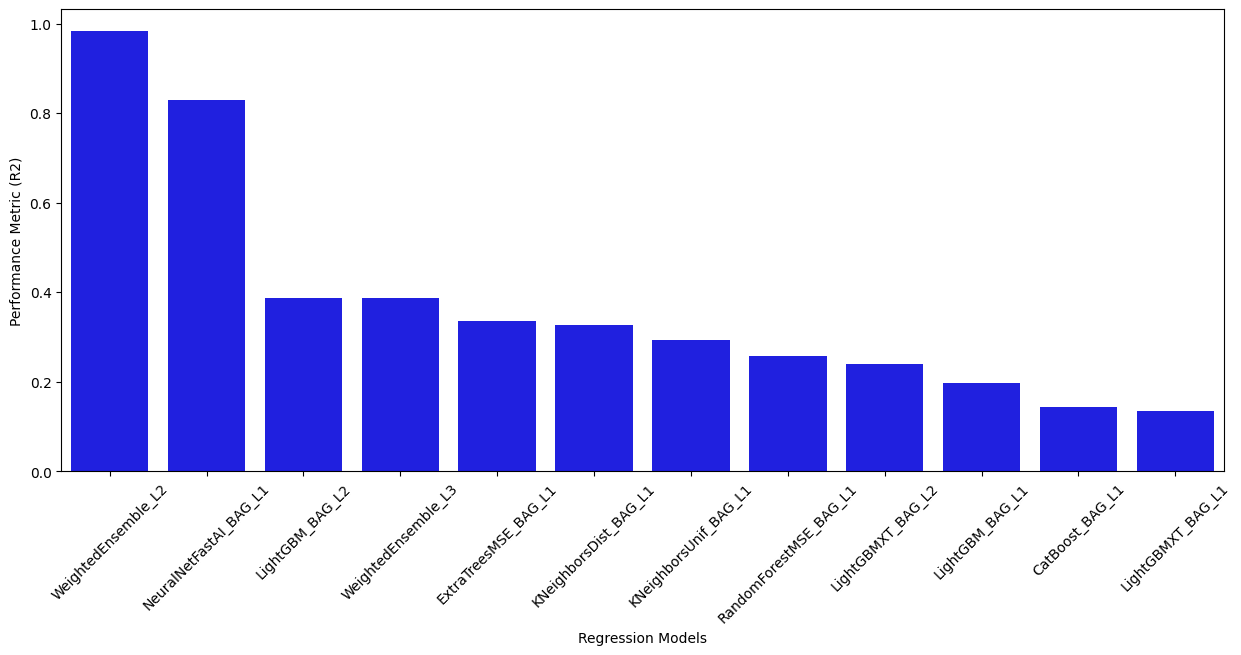

In [38]:
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [39]:
predictor.evaluate(X_prueba)

Evaluation: r2 on test data: 0.9545355322740902
Evaluations on test data:
{
    "r2": 0.9545355322740902,
    "root_mean_squared_error": -950.714200008069,
    "mean_squared_error": -903857.4900969827,
    "mean_absolute_error": -730.3290243968976,
    "pearsonr": 0.9809992088443795,
    "median_absolute_error": -586.12841796875
}


{'r2': 0.9545355322740902,
 'root_mean_squared_error': -950.714200008069,
 'mean_squared_error': -903857.4900969827,
 'mean_absolute_error': -730.3290243968976,
 'pearsonr': 0.9809992088443795,
 'median_absolute_error': -586.12841796875}

In [40]:
y_prueba = X_prueba['total (R$)']
y_prueba # valores correctos

6927     3606.0
6567    16440.0
8067    17370.0
7869     9233.0
358      3437.0
         ...   
2904     9713.0
9443     3408.0
9486     2946.0
2455     2017.0
3909     1661.0
Name: total (R$), Length: 1593, dtype: float64

Text(0.5, 0, 'Valores reales')

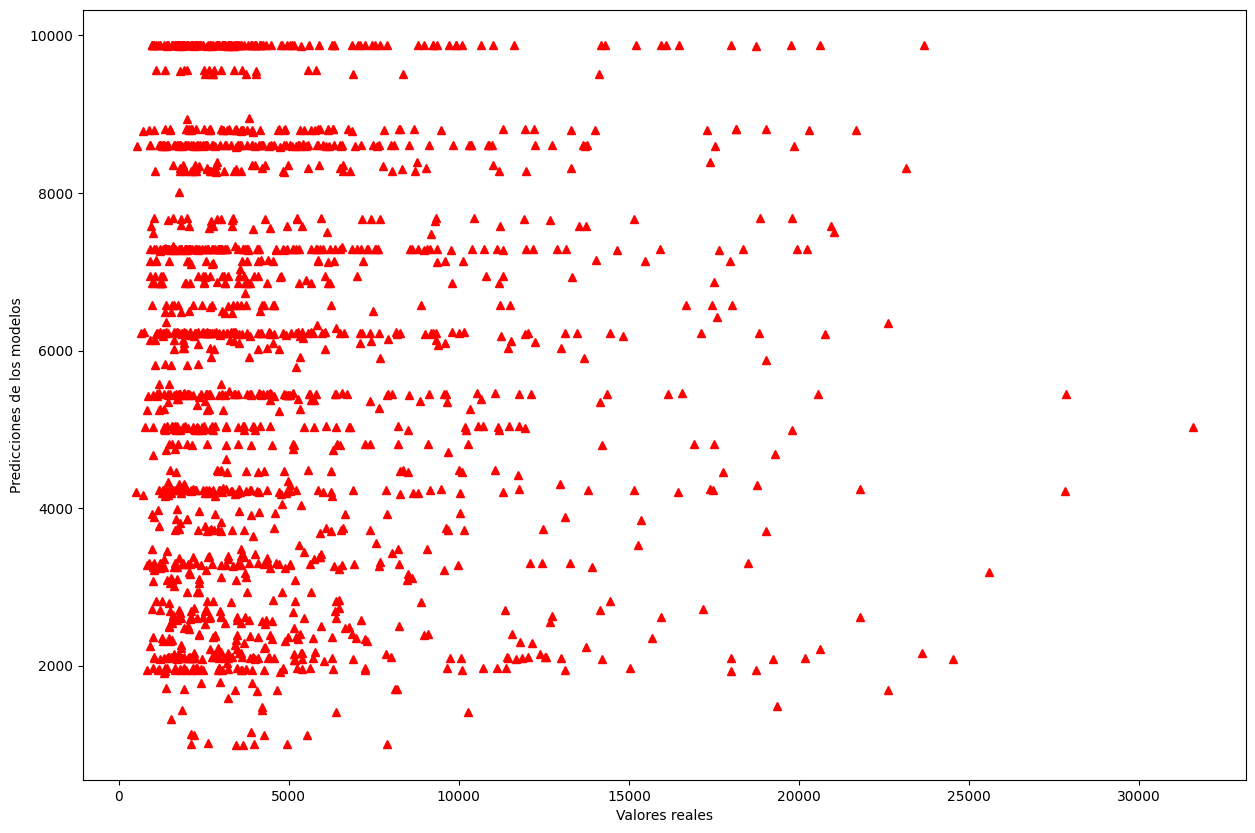

In [41]:
y_predicc = predictor.predict(X_test)
plt.figure(figsize = (15, 10))
plt.plot(y_prueba, y_predicc, "^", color = 'r')
plt.ylabel('Predicciones de los modelos')
plt.xlabel('Valores reales')

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_prueba, y_predicc)),'.3f'))
MSE = mean_squared_error(y_prueba, y_predicc)
MAE = mean_absolute_error(y_prueba, y_predicc)
r2 = r2_score(y_prueba, y_predicc)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 5227.347 
MSE = 27325157.079500925 
MAE = 4048.5397488294125 
R2 = -0.3744685813391728


In [114]:
import joblib
joblib.dump(batched_model, 'modelo_entrenado.joblib')

['modelo_entrenado.joblib']

In [115]:
import streamlit as st
import pandas as pd
import joblib


In [ ]:
st.title('Predicción de Precio de Alquiler')

ciudad = st.selectbox('Ciudad', ['Ciudad1', 'Ciudad2', 'Ciudad3', ...])
area = st.number_input('Área en m²', min_value=0)
rooms = st.number_input('Número de Habitaciones', min_value=0, format="%d")
bathroom = st.number_input('Número de Baños', min_value=0, format="%d")
parking_spaces = st.number_input('Número de Espacios para Parqueo', min_value=0, format="%d")
floor = st.number_input('Nivel o Piso', min_value=0, format="%d")
animal = st.selectbox('¿Se Permiten Animales?', ['Sí', 'No'])
furniture = st.selectbox('¿Está Amueblado?', ['Sí', 'No'])
hoa = st.number_input('Impuesto de la Asociación de Residentes (R$)', min_value=0)
property_tax = st.number_input('Impuesto sobre Bienes Inmuebles (R$)', min_value=0)
fire_insurance = st.number_input('Seguro contra Incendios (R$)', min_value=0)


In [ ]:
datos = pd.DataFrame([[
    ciudad, area, rooms, bathroom, parking_spaces, floor,
    animal, furniture, hoa, property_tax, fire_insurance
]], columns=[
    'city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
    'animal', 'furniture', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)'
])


In [ ]:
if st.button('Realizar Predicción'):
    predicción = batched_model.predict(datos)
    st.write(f'La predicción del precio de alquiler es: R$ {predicción[0]:.2f}')